<a href="https://colab.research.google.com/github/Raphael-Blaize/Future-Contraceptive-Use/blob/main/Intelligent_Forecasting_Challenge_Model_Future_Contraceptive__Use_in_Cote_d'Ivoire.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INTELLIGENT FORECASTING CHALLENGE**

## **DEFINING THE QUESTION**

### **SPECIFYING THE QUESTION**



> We  are required to build a model that will effectively predict the use of contraceptives in Côte d'Ivoire.





### **DEFINING THE METRIC OF SUCCESS**


> Our challenge is a regression problem. Therefore, our project will be considered a success if we're able to develop a model with the lowest error metric.



### **UNDERSTANDING THE CONTEXT**

> Contraceptive access is vital to safe motherhood, healthy families, and prosperous communities. Greater access to contraceptives enables couples and individuals to determine whether, when, and how often to have children. In low- and middle-income countries (LMIC) like Côte d'Ivoire, health systems are often unable to accurately predict the quantity of contraceptives necessary for each health service delivery site, in part due to insufficient data, limited staff capacity, and inadequate systems.

>When too few supplies are ordered, service delivery sites may run out, limiting access to contraceptives and family planning. When too much product is ordered, unused contraceptives are wasted if they are left to expire.

>Accurate forecasting of contraceptive consumption can save lives, money, and time by ensuring health service delivery sites have what they need when they need it and by reducing waste in the supply chain.

### **RECORDING THE EXPERIMENTAL DESIGN**

* Import the relevant libraries that we will use in our analysis.
* Read and explore the dataset we will use for our project.
* Define the appropriateness of the available data with regards to the project
* Find and deal with outliers and missing data within the dataset.
* Perform univariate and bivariate analysis while recording our observations.
* Implement the solution by using the various regression algorithms to predict the future consumption of contraceptives based on given information.
* Challenge the solution by giving insights on how we can optimize the models to give us a better performance as compared to the baseline model.
* Provide recommendations based on the whole analysis and modelling techniques used in the project.

### **DATA RELEVANCE**

> This was evaluated against the metric of success after solution implementation. Our main dataset is the **Train Dataset**.

> The train dataset has the following columns:
1. **year:**	The year of the observation											
2. **month:**	The month of the observation											
3. **region:**	The higher level geographical area within Côte d'Ivoire
4. **district:**	The lower level geographical area within Côte d'Ivoire
5. **site_code:**	The actual health service delivery site					
6. **product_code:**	The unique identifier for each commodity.
7. **stock_initial:**	Stock in hand of previous period. This is quantified in dispensing units. 											
8. **stock_received:**	Total quantity received in last period. This is quantified in dispensing units. 											
9. **stock_distributed*:**	Quantity dispensed/consumed in last reporting period. This is quantified in dispensing units. Note: This is the target variable. 											
10. **stock_adjustment:**	All kinds of losses/ adjustments made at the facility											
11. **stock_end:**	Current physical count of stock on hand. This is quantified in dispensing units.											
12. **average_monthly_consumption:**	"Average monthly consumption, for last three months. This is quantified in dispensing units. 
Note: Average monthly consumption in the system actually provides an average of the most recently available Normalized Consumption values. Normalized Consumption is the stock_distributed value adjusted to reflect any stock_stockout_days. Because months are approximated to have 30 days, one which had 15 stockout days would yield a Normalized Consumption of exactly twice its Monthly Consumption."											
13. **stock_stockout_days:**	Total number of days facility was out of stock.											
14. **stock_ordered:**	The requested quantity. This is quantified in dispensing units.											
											


## **EXTERNAL DATASOURCE VALIDATION**

## **READING THE DATA**

In [1]:
#Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#!pip install pmdarima

#Ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# READING OUR ANNUAL DATASET
annual = pd.read_csv('contraceptive_case_data_annual.csv')

# Reading our monthly
monthly = pd.read_csv('monthly_cases.csv')

# Reading service delivery site data
site = pd.read_csv('service_delivery_site_data.csv')

# Reading our Train dataset
df = pd.read_csv('Train.csv')

# Reading the product dataset
prod = pd.read_csv('product.csv')

## **PREVIEWING THE DATA**

In [3]:
# Previewing our Annual dataset
annual.head(5)

,district,year,implant_women_old,implant_women_new,injection2_women_old,injection2_women_new,injection3_women_old,injection3_women_new,pill_women_old,pill_women_new,iud_women_old,iud_women_new,iud_number_dispensed,implant_number_dispensed,injection2_number_dispensed,injection3_number_dispensed,pill_number_dispensed,iud_number_received,implant_number_received,injection2_number_received,injection3_number_received,pill_number_received,iud_stock_end,implant_stock_end,injection2_stock_end,injection3_stock_end,pill_stock_end
0,ABENGOUROU,2018,3298.0,965.0,2997.0,749.0,10892,2609,1867.0,425.0,117.0,15.0,26.0,823.0,3681.0,7082.0,6893.0,673.0,2435.0,8799.0,12890.0,35961.0,NaN,3167.0,NaN,16041.0,48097.0
1,ABENGOUROU,2017,2597.0,698.0,2125.0,588.0,9939,2480,1835.0,400.0,34.0,22.0,15.0,483.0,2894.0,6460.0,6339.0,544.0,1760.0,9920.0,12727.0,31260.0,NaN,2617.0,NaN,16403.0,41079.0
2,ABENGOUROU,2016,865.0,408.0,2616.0,786.0,8407,2440,2675.0,439.0,20.0,24.0,19.0,438.0,3167.0,5394.0,5982.0,436.0,1503.0,11407.0,12666.0,28256.0,NaN,1671.0,NaN,8561.0,20878.0
3,ABOBO EST,2018,4041.0,2234.0,2200.0,583.0,13504,3940,2959.0,673.0,383.0,180.0,155.0,2372.0,878.0,9512.0,5234.0,1154.0,3309.0,2241.0,9914.0,7426.0,NaN,3092.0,NaN,9359.0,9046.0
4,ABOBO EST,2017,1954.0,2491.0,1768.0,214.0,10745,2389,3506.0,679.0,147.0,259.0,258.0,3066.0,1805.0,8939.0,6957.0,2780.0,4009.0,5846.0,11784.0,13191.0,NaN,2596.0,NaN,6359.0,11711.0


In [4]:
# Previewing the monthly dataset
monthly.head(5)

,district,month,year,implant_women_old,implant_women_new,injection2_women_old,injection2_women_new,injection3_women_old,injection3_women_new,pill_women_old,pill_women_new,iud_women_old,iud_women_new,iud_number_dispensed,implant_number_dispensed,injection2_number_dispensed,injection3_number_dispensed,pill_number_dispensed,iud_number_received,implant_number_received,injection2_number_received,injection3_number_received,pill_number_received,iud_stock_end,implant_stock_end,injection2_stock_end,injection3_stock_end,pill_stock_end
0,ABENGOUROU,1,2019,478.0,91.0,103.0,17.0,1278,296,195.0,34.0,NaN,NaN,NaN,75.0,44.0,1082.0,2542.0,NaN,319.0,33.0,1244.0,2846.0,NaN,422.0,NaN,1501.0,3466.0
1,ABENGOUROU,2,2019,340.0,81.0,126.0,10.0,1237,253,187.0,19.0,9.0,1.0,1.0,66.0,38.0,813.0,557.0,20.0,255.0,17.0,1174.0,2608.0,NaN,394.0,NaN,1535.0,3327.0
2,ABENGOUROU,3,2019,367.0,59.0,14.0,7.0,1300,224,147.0,26.0,NaN,5.0,5.0,47.0,42.0,819.0,665.0,50.0,214.0,50.0,1050.0,2148.0,NaN,340.0,NaN,1187.0,3636.0
3,ABENGOUROU,4,2019,583.0,46.0,6.0,1.0,1296,336,200.0,35.0,NaN,3.0,1.0,36.0,66.0,874.0,404.0,45.0,217.0,55.0,824.0,1787.0,NaN,340.0,NaN,889.0,2727.0
4,ABENGOUROU,5,2019,407.0,60.0,46.0,20.0,1356,281,156.0,24.0,NaN,1.0,1.0,71.0,47.0,813.0,545.0,14.0,321.0,256.0,1032.0,1635.0,NaN,355.0,NaN,604.0,1668.0


In [5]:
# Previewing the site dataset
site.head(5)

,site_code,site_type,site_region,site_district,site_latitude,site_longitude
0,C1399,Health Center,ABIDJAN 2,COCODY-BINGERVILLE,5.352721,-3.940210
1,C4001,Hospital,INDENIE-DJUABLIN,ABENGOUROU,6.730937,-3.483863
2,C1004,Hospital,AGNEBY-TIASSA-ME,AGBOVILLE,5.928340,-4.211450
3,C4002,Hospital,BOUNKANI-GONTOUGO,BONDOUKOU,8.041860,-2.798370
4,C2002,Hospital,MARAHOUE,BOUAFLE,6.984120,-5.751980


In [6]:
# Previewing our Train dataset
df.head(5)

,year,month,region,district,site_code,product_code,stock_initial,stock_received,stock_distributed,stock_adjustment,stock_end,average_monthly_consumption,stock_stockout_days,stock_ordered
0,2019,1,INDENIE-DJUABLIN,ABENGOUROU,C4001,AS27134,75,0,21,-54,0,18,0,100.0
1,2019,1,INDENIE-DJUABLIN,ABENGOUROU,C4001,AS27132,3,0,3,0,0,2,0,10.0
2,2019,1,INDENIE-DJUABLIN,ABENGOUROU,C4001,AS27000,0,75,22,0,53,9,0,0.0
3,2019,1,INDENIE-DJUABLIN,ABENGOUROU,C4001,AS27137,2,0,0,0,2,0,0,0.0
4,2019,1,INDENIE-DJUABLIN,ABENGOUROU,C4001,AS27138,45,0,2,0,43,1,0,0.0


In [7]:
# Check the records we have in our annual dataset
print('annual dataset\n',annual.shape,'\n')
print('monthly dataset\n',monthly.shape,'\n')
print('Train dataset\n',df.shape,'\n')


annual dataset
 (339, 27) 

monthly dataset
 (678, 28) 

Train dataset
 (35753, 14) 



In [8]:
# Checking the info on our annual dataset 
annual.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 339 entries, 0 to 338
Data columns (total 27 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   district                     339 non-null    object 
 1   year                         339 non-null    int64  
 2   implant_women_old            326 non-null    float64
 3   implant_women_new            337 non-null    float64
 4   injection2_women_old         337 non-null    float64
 5   injection2_women_new         334 non-null    float64
 6   injection3_women_old         339 non-null    int64  
 7   injection3_women_new         339 non-null    int64  
 8   pill_women_old               339 non-null    float64
 9   pill_women_new               338 non-null    float64
 10  iud_women_old                212 non-null    float64
 11  iud_women_new                277 non-null    float64
 12  iud_number_dispensed         233 non-null    float64
 13  implant_number_dispe

In [9]:
# checking the info on our monthly dataset 
monthly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 678 entries, 0 to 677
Data columns (total 28 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   district                     678 non-null    object 
 1   month                        678 non-null    int64  
 2   year                         678 non-null    int64  
 3   implant_women_old            610 non-null    float64
 4   implant_women_new            672 non-null    float64
 5   injection2_women_old         556 non-null    float64
 6   injection2_women_new         481 non-null    float64
 7   injection3_women_old         678 non-null    int64  
 8   injection3_women_new         678 non-null    int64  
 9   pill_women_old               621 non-null    float64
 10  pill_women_new               595 non-null    float64
 11  iud_women_old                250 non-null    float64
 12  iud_women_new                306 non-null    float64
 13  iud_number_dispensed

In [10]:
# checking the info on our train dataset 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35753 entries, 0 to 35752
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   year                         35753 non-null  int64  
 1   month                        35753 non-null  int64  
 2   region                       35753 non-null  object 
 3   district                     35753 non-null  object 
 4   site_code                    35753 non-null  object 
 5   product_code                 35753 non-null  object 
 6   stock_initial                35753 non-null  int64  
 7   stock_received               35753 non-null  int64  
 8   stock_distributed            35753 non-null  int64  
 9   stock_adjustment             35753 non-null  int64  
 10  stock_end                    35753 non-null  int64  
 11  average_monthly_consumption  35753 non-null  int64  
 12  stock_stockout_days          35753 non-null  int64  
 13  stock_ordered   

In [11]:
# Summary of the numerical attributes
annual.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
year,339.0,2017.000000,0.817704,2016.0,2016.00,2017.0,2018.00,2018.0
implant_women_old,326.0,1499.193252,2975.216904,1.0,90.75,459.0,1430.00,23226.0
implant_women_new,337.0,572.875371,633.746985,5.0,146.00,350.0,749.00,3959.0
injection2_women_old,337.0,1097.528190,1641.024406,2.0,132.00,498.0,1295.00,10349.0
injection2_women_new,334.0,243.158683,398.174681,1.0,60.00,145.0,293.75,4535.0
injection3_women_old,339.0,5657.554572,25958.064589,144.0,1612.50,2828.0,5433.00,475882.0
injection3_women_new,339.0,1065.843658,809.122417,65.0,460.00,879.0,1456.00,5164.0
pill_women_old,339.0,1206.662832,1774.006091,1.0,154.00,490.0,1502.00,12508.0
pill_women_new,338.0,269.105621,615.979742,1.0,60.50,141.0,311.25,8376.0
iud_women_old,212.0,138.396226,367.104029,1.0,12.00,37.5,130.00,3482.0


In [12]:
# Summary of the numerical attributes
monthly.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
month,678.0,3.500000,1.709086,1.0,2.00,3.5,5.00,6.0
year,678.0,2019.000000,0.000000,2019.0,2019.00,2019.0,2019.00,2019.0
implant_women_old,610.0,213.509836,358.961649,1.0,12.00,75.0,288.50,2883.0
implant_women_new,672.0,77.831845,108.731927,1.0,21.00,45.0,87.00,1344.0
injection2_women_old,556.0,39.429856,71.846085,1.0,6.00,18.0,50.00,1259.0
injection2_women_new,481.0,9.428274,12.449881,1.0,2.00,5.0,12.00,133.0
injection3_women_old,678.0,495.436578,467.385785,20.0,184.50,320.0,665.75,2534.0
injection3_women_new,678.0,110.523599,94.042050,7.0,51.00,87.0,136.75,1061.0
pill_women_old,621.0,98.466989,126.187320,1.0,15.00,45.0,130.00,726.0
pill_women_new,595.0,17.986555,26.655676,1.0,5.00,10.0,21.00,314.0


In [13]:
# Summary of the numerical attributes
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
year,35753.0,2017.433782,1.019933,2016.0,2017.0,2017.0,2018.0,2019.0
month,35753.0,6.169412,3.429079,1.0,3.0,6.0,9.0,12.0
stock_initial,35753.0,63.245518,168.661538,0.0,0.0,12.0,69.0,4320.0
stock_received,35753.0,14.846055,70.631782,0.0,0.0,0.0,0.0,3534.0
stock_distributed,35753.0,14.764327,39.848242,0.0,0.0,1.0,13.0,1728.0
stock_adjustment,35753.0,0.961150,37.883099,-1440.0,0.0,0.0,0.0,3003.0
stock_end,35753.0,64.288395,170.848479,0.0,0.0,13.0,70.0,4320.0
average_monthly_consumption,35753.0,14.606439,32.521384,0.0,0.0,3.0,16.0,864.0
stock_stockout_days,35753.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
stock_ordered,34990.0,26.658102,107.166082,0.0,0.0,0.0,20.0,10240.0


#### **MERGING THE TRAIN DATASET** 

In [14]:
# Merging the train dataset with the relevant columns

# adopting the site type column to the train dataset
df=pd.merge(site[['site_code','site_type']],df,how='inner',left_on=['site_code'],right_on=['site_code'])

# adopting the product type column to the train dataset
df = pd.merge(prod[['product_code','product_type']],df,how='inner',left_on=['product_code'],right_on=['product_code'])

# dropping the product code column
df.drop(columns=['product_code'], axis = 1, inplace=True)

df.head(5)

,product_type,site_code,site_type,year,month,region,district,stock_initial,stock_received,stock_distributed,stock_adjustment,stock_end,average_monthly_consumption,stock_stockout_days,stock_ordered
0,Female Condom,C4001,Hospital,2016,1,INDENIE-DJUABLIN,ABENGOUROU,0,0,0,0,0,0,0,0.0
1,Female Condom,C2002,Hospital,2017,1,MARAHOUE,BOUAFLE,0,0,0,0,0,0,0,0.0
2,Female Condom,C2002,Hospital,2017,2,MARAHOUE,BOUAFLE,0,0,0,0,0,0,0,0.0
3,Female Condom,C2002,Hospital,2017,3,MARAHOUE,BOUAFLE,0,0,0,0,0,0,0,0.0
4,Female Condom,C2002,Hospital,2017,4,MARAHOUE,BOUAFLE,0,0,0,0,0,0,0,0.0


## **DATA CLEANING**

### **REMOVING DUPLICATES**


In [15]:
# Check for the consistency in our data
print('annual\n',annual.duplicated().sum())
print('monthly\n',monthly.duplicated().sum())
print('train\n',df.duplicated().sum())


annual
 0
monthly
 0
train
 0


### **DEALING WITH MISSING VALUES**

##### **ANNUAL DATASET**

In [16]:
#Calaculating the percentage of missing values and then visualising it 
# Count the missing values
missing_count = annual.isnull().sum() 
#the count of all values
value_count = annual.isnull().count() 
#the percetage of missing values
missing_percentage = round(missing_count / value_count * 100,2) 
#Cretaing a dataframe
missing_df = pd.DataFrame({'count' : missing_count, 'percentage' : missing_percentage}) 
print(missing_df)

                             count  percentage
district                         0        0.00
year                             0        0.00
implant_women_old               13        3.83
implant_women_new                2        0.59
injection2_women_old             2        0.59
injection2_women_new             5        1.47
injection3_women_old             0        0.00
injection3_women_new             0        0.00
pill_women_old                   0        0.00
pill_women_new                   1        0.29
iud_women_old                  127       37.46
iud_women_new                   62       18.29
iud_number_dispensed           106       31.27
implant_number_dispensed         6        1.77
injection2_number_dispensed      8        2.36
injection3_number_dispensed      1        0.29
pill_number_dispensed            5        1.47
iud_number_received             94       27.73
implant_number_received          6        1.77
injection2_number_received      11        3.24
injection3_nu

In [17]:
#Dropping the iud_stock_end and injection2_stock_end
annual.drop(columns = ["iud_stock_end", "injection2_stock_end"], inplace = True)

In [18]:
# filling the null values with zero
annual.fillna(0, inplace=True)
annual.isnull().sum()

district                       0
year                           0
implant_women_old              0
implant_women_new              0
injection2_women_old           0
injection2_women_new           0
injection3_women_old           0
injection3_women_new           0
pill_women_old                 0
pill_women_new                 0
iud_women_old                  0
iud_women_new                  0
iud_number_dispensed           0
implant_number_dispensed       0
injection2_number_dispensed    0
injection3_number_dispensed    0
pill_number_dispensed          0
iud_number_received            0
implant_number_received        0
injection2_number_received     0
injection3_number_received     0
pill_number_received           0
implant_stock_end              0
injection3_stock_end           0
pill_stock_end                 0
dtype: int64

* We dropped the rows that had no entries recorded (100% missing values) and proceeded to fill the rest of the columns with zeros.

##### **MONTHLY DATASET**

In [19]:
#Calaculating the percentage of missing values and the visualising it 
# Count the missing values
missing_count = monthly.isnull().sum() 
#the count of all values
value_count = monthly.isnull().count() 
#the percetage of missing values
missing_percentage = round(missing_count / value_count * 100,2) 
#Cretaing a dataframe
missing_df = pd.DataFrame({'count' : missing_count, 'percentage' : missing_percentage}) 
print(missing_df)

                             count  percentage
district                         0        0.00
month                            0        0.00
year                             0        0.00
implant_women_old               68       10.03
implant_women_new                6        0.88
injection2_women_old           122       17.99
injection2_women_new           197       29.06
injection3_women_old             0        0.00
injection3_women_new             0        0.00
pill_women_old                  57        8.41
pill_women_new                  83       12.24
iud_women_old                  428       63.13
iud_women_new                  372       54.87
iud_number_dispensed           429       63.27
implant_number_dispensed        29        4.28
injection2_number_dispensed    170       25.07
injection3_number_dispensed     16        2.36
pill_number_dispensed           63        9.29
iud_number_received            344       50.74
implant_number_received         35        5.16
injection2_nu

In [20]:
#Dropping the iud_stock_end and injection2_stock_end
monthly.drop(columns = ["iud_stock_end", "injection2_stock_end"], inplace = True)

In [21]:
# filling the null values with zero
monthly.fillna(0, inplace=True)
monthly.isnull().sum()

district                       0
month                          0
year                           0
implant_women_old              0
implant_women_new              0
injection2_women_old           0
injection2_women_new           0
injection3_women_old           0
injection3_women_new           0
pill_women_old                 0
pill_women_new                 0
iud_women_old                  0
iud_women_new                  0
iud_number_dispensed           0
implant_number_dispensed       0
injection2_number_dispensed    0
injection3_number_dispensed    0
pill_number_dispensed          0
iud_number_received            0
implant_number_received        0
injection2_number_received     0
injection3_number_received     0
pill_number_received           0
implant_stock_end              0
injection3_stock_end           0
pill_stock_end                 0
dtype: int64

* We dropped the rows that had no entries recorded (100% missing values) and proceeded to fill the rest of the columns with zeros.

##### **TRAIN DATASET**

In [22]:
#Calaculating the percentage of missing values and the visualising it 
# Count the missing values
missing_count = df.isnull().sum() 
#the count of all values
value_count = df.isnull().count() 
#the percetage of missing values
missing_percentage = round(missing_count / value_count * 100,2) 
#Cretaing a dataframe
missing_df = pd.DataFrame({'count' : missing_count, 'percentage' : missing_percentage}) 
print(missing_df)

                             count  percentage
product_type                     0        0.00
site_code                        0        0.00
site_type                        0        0.00
year                             0        0.00
month                            0        0.00
region                           0        0.00
district                         0        0.00
stock_initial                    0        0.00
stock_received                   0        0.00
stock_distributed                0        0.00
stock_adjustment                 0        0.00
stock_end                        0        0.00
average_monthly_consumption      0        0.00
stock_stockout_days              0        0.00
stock_ordered                  763        2.13


### **TAKING CARE OF THE INVALID ZEROS IN OUR DATASET**


These invalid 0 values may be identified, for example, when:

A) Stock_distributed for a contraceptive product at a service delivery site is reported in a given month as '0', even though stock was available (stock_initial was above 0) and stock_distributed is historically well above 0.

B) All fields (possibly with the exception of stock_ordered) are recorded as '0' for a given contraceptive product, month and service delivery site; or

#### **FULFILLING THE FIRST CONDITION**

In [23]:
# Defining a function that takes the conditions listed above and fills invalid zeros with a ?
def invalid(stock_initial, stock_received , stock_adjustment, stock_end, average_monthly_consumption, stock_ordered, stock_distributed):
    if stock_initial > 0 and average_monthly_consumption > 0 and stock_distributed == 0:
      stock_distributed = '?' 
    else:
        stock_distributed=stock_distributed
    return stock_distributed
              

#Mapping our function onto a new column
df['NewColumn_1'] = df.apply(lambda x: invalid(x['stock_initial'], x['stock_received'], x['stock_adjustment'], x['stock_end'],
                                               x['average_monthly_consumption'], x['stock_ordered'], x["stock_distributed"]), axis=1)
df.replace('?', np.nan, inplace=True)
df.rename(columns={"NewColumn_1" : "stock_distributed2"}, inplace = True)

In [24]:
#Cheking missing values on our columns
df.isnull().sum()

product_type                      0
site_code                         0
site_type                         0
year                              0
month                             0
region                            0
district                          0
stock_initial                     0
stock_received                    0
stock_distributed                 0
stock_adjustment                  0
stock_end                         0
average_monthly_consumption       0
stock_stockout_days               0
stock_ordered                   763
stock_distributed2             2858
dtype: int64

In [25]:
#Filling null values with the mode
df["stock_ordered"].fillna(df["stock_ordered"].mode()[0], inplace = True)

# Cheking if null values have been replaced with the mode
df.isnull().sum()

product_type                      0
site_code                         0
site_type                         0
year                              0
month                             0
region                            0
district                          0
stock_initial                     0
stock_received                    0
stock_distributed                 0
stock_adjustment                  0
stock_end                         0
average_monthly_consumption       0
stock_stockout_days               0
stock_ordered                     0
stock_distributed2             2858
dtype: int64

####**CONVERTING TO DATETIME**

In [26]:
#convert to date time
df['date'] = df['year'].astype(str) + '-' + df['month'].astype(str)

df['date'] = pd.to_datetime(df['date'],yearfirst=True)

df = df.set_index('date')
df.head()

,product_type,site_code,site_type,year,month,region,district,stock_initial,stock_received,stock_distributed,stock_adjustment,stock_end,average_monthly_consumption,stock_stockout_days,stock_ordered,stock_distributed2
date,,,,,,,,,,,,,,,,
2016-01-01,Female Condom,C4001,Hospital,2016,1,INDENIE-DJUABLIN,ABENGOUROU,0,0,0,0,0,0,0,0.0,0.0
2017-01-01,Female Condom,C2002,Hospital,2017,1,MARAHOUE,BOUAFLE,0,0,0,0,0,0,0,0.0,0.0
2017-02-01,Female Condom,C2002,Hospital,2017,2,MARAHOUE,BOUAFLE,0,0,0,0,0,0,0,0.0,0.0
2017-03-01,Female Condom,C2002,Hospital,2017,3,MARAHOUE,BOUAFLE,0,0,0,0,0,0,0,0.0,0.0
2017-04-01,Female Condom,C2002,Hospital,2017,4,MARAHOUE,BOUAFLE,0,0,0,0,0,0,0,0.0,0.0


In [27]:
df.sort_values(by='date',ascending=True, inplace = True)

# Lokking at the unique values
df["year"].unique()

array([2016, 2017, 2018, 2019])

In [28]:
#dropping null values in stock distributed2
df.dropna(inplace=True)

In [29]:
#checking the null values
df.isnull().sum()

product_type                   0
site_code                      0
site_type                      0
year                           0
month                          0
region                         0
district                       0
stock_initial                  0
stock_received                 0
stock_distributed              0
stock_adjustment               0
stock_end                      0
average_monthly_consumption    0
stock_stockout_days            0
stock_ordered                  0
stock_distributed2             0
dtype: int64

In [30]:
#Dropping the stock distributed column
df.drop(columns = ["stock_distributed", "stock_stockout_days"], inplace = True)

#### **FULFILLING THE SECOND CONDITION**




In [31]:
# Defining a function that takes the conditions listed above and fills invalid zeros with a ?
def invalid(stock_initial, stock_received , stock_adjustment, stock_end, average_monthly_consumption, stock_ordered, stock_distributed2): 
    if stock_initial == 0 and stock_received == 0 and stock_adjustment == 0 and stock_end == 0 and average_monthly_consumption == 0 and stock_ordered == 0:
      stock_distributed2 = '?'
      stock_initial = '?'
      stock_received = '?'
      stock_adjustment = '?'
      stock_end = '?'
      average_monthly_consumption = '?'
      stock_ordered = '?'
    else:
        stock_distributed2=stock_distributed2
        stock_initial=stock_initial
        stock_received=stock_received
        stock_adjustment=stock_adjustment
        stock_end=stock_end
        stock_ordered=stock_ordered
        average_monthly_consumption=average_monthly_consumption
    #Pandas Series.mean() function return the mean of the underlying data in the given Series object.
    return pd.Series([
                      stock_distributed2,
                      stock_initial,
                      stock_received,
                      stock_adjustment,
                      stock_end,
                      stock_ordered,
                      average_monthly_consumption
    ])

#Mapping our function onto a new column
df[['NewColumn_1', 'NewColumn_2', 'NewColumn_3', 'NewColumn_4', 'NewColumn_5','NewColumn_6', 'NewColumn_7' ]] = df.apply(lambda x: invalid(x['stock_initial'], x['stock_received'], x['stock_adjustment'], x['stock_end'],
                                               x['average_monthly_consumption'], x['stock_ordered'], x["stock_distributed2"]), axis=1)
df.replace('?', np.nan, inplace=True)
df.rename(columns={"NewColumn_1" : "stock_distributed3"}, inplace = True)
df.rename(columns={"NewColumn_2" : "stock_initial2"}, inplace = True)
df.rename(columns={"NewColumn_3" : "stock_received2"}, inplace = True)
df.rename(columns={"NewColumn_4" : "stock_adjustment2"}, inplace = True)
df.rename(columns={"NewColumn_5" : "stock_end2"}, inplace = True)
df.rename(columns={"NewColumn_6" : "stock_ordered2"}, inplace = True)
df.rename(columns={"NewColumn_7" : "average_monthly_consumption2"}, inplace = True)

In [32]:
#Cheking if the null values have been chosen  
df.isnull().sum()

product_type                       0
site_code                          0
site_type                          0
year                               0
month                              0
region                             0
district                           0
stock_initial                      0
stock_received                     0
stock_adjustment                   0
stock_end                          0
average_monthly_consumption        0
stock_ordered                      0
stock_distributed2                 0
stock_distributed3              4883
stock_initial2                  4883
stock_received2                 4883
stock_adjustment2               4883
stock_end2                      4883
stock_ordered2                  4883
average_monthly_consumption2    4883
dtype: int64

In [33]:
# Dropping the null values in the column
df.dropna(axis = 0, inplace = True)

In [34]:
# Dropping the unecessary column 
df.drop(columns = ["stock_initial", 'stock_received', 'stock_distributed2',
       'stock_adjustment', 'stock_end', 'average_monthly_consumption',
       'stock_ordered'], inplace = True)

In [35]:
#Cheking to see whether the null values have been dropped
df.isnull().sum()

product_type                    0
site_code                       0
site_type                       0
year                            0
month                           0
region                          0
district                        0
stock_distributed3              0
stock_initial2                  0
stock_received2                 0
stock_adjustment2               0
stock_end2                      0
stock_ordered2                  0
average_monthly_consumption2    0
dtype: int64

In [36]:
df.rename(columns={"stock_distributed3" : "stock_distributed2"}, inplace = True)
df.rename(columns={"stock_initial2" : "stock_initial"}, inplace = True)
df.rename(columns={"stock_received2" : "stock_received"}, inplace = True)
df.rename(columns={"stock_adjustment2" : "stock_adjustment"}, inplace = True)
df.rename(columns={"stock_end2" : "stock_end"}, inplace = True)
df.rename(columns={"stock_ordered2" : "stock_ordered"}, inplace = True)
df.rename(columns={"average_monthly_consumption2" : "average_monthly_consumption"}, inplace = True)

### **CHECKING FOR OUTLIERS**

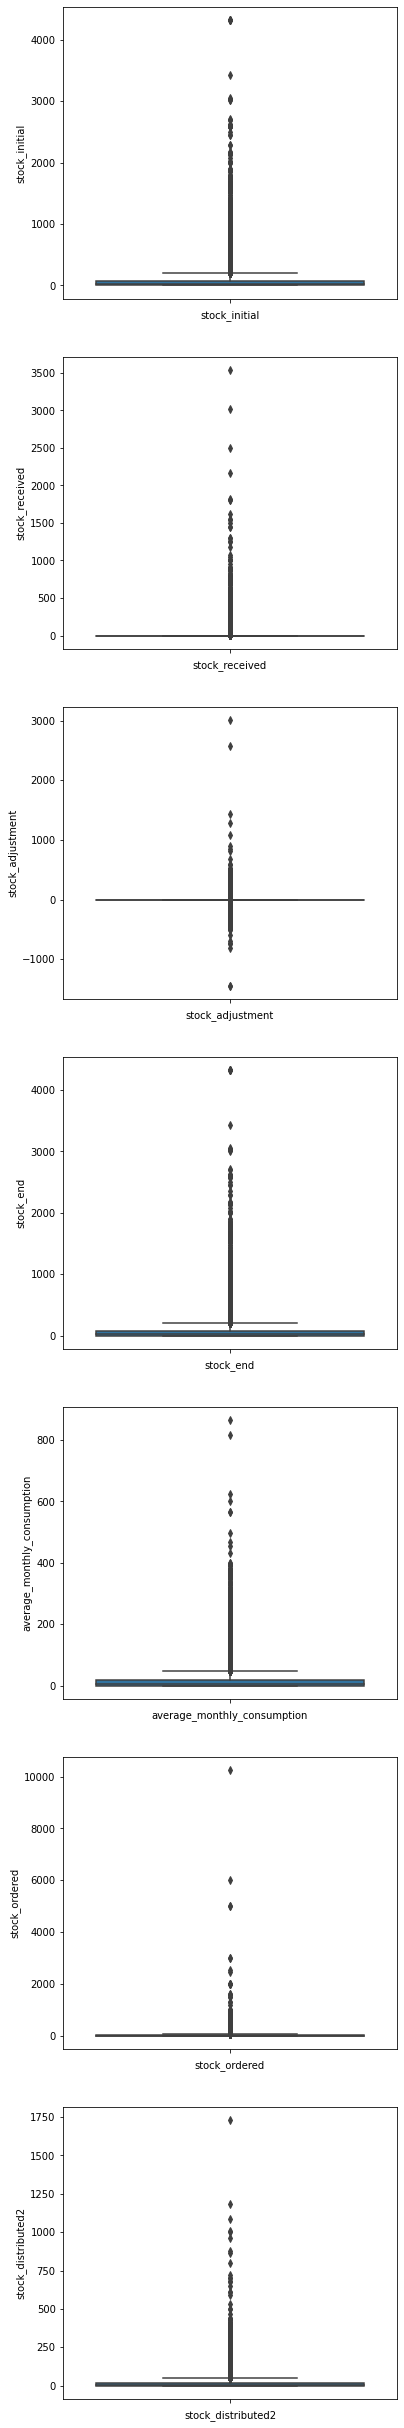

In [37]:
# Checking for outliers for numeric variables
import seaborn as sns
cols = ['stock_initial', 'stock_received', 'stock_adjustment', 'stock_end',
       'average_monthly_consumption', 'stock_ordered', 'stock_distributed2']

fig, axs = plt.subplots(len(cols), figsize=(6,44))

for i, col_val in enumerate(cols):
    sns.boxplot(y=df[col_val], ax=axs[i])
    axs[i].set_xlabel(col_val, fontsize=10)

The Number of outliers after dropping is quite significant so we won't drop the outliers because we may lose valuable information, we will consider log transformation instead for this case of our dataset

In [38]:
#Exporting to csv
annual.to_csv("Contraceptive_case_data_annual_cleaned.csv")

df.to_csv("train_cleaned.csv")

monthly.to_csv("monthly_cleaned.csv")

## **EXPLORATORY DATA ANALYSIS**

### **DISTRIBUTION PLOTS**

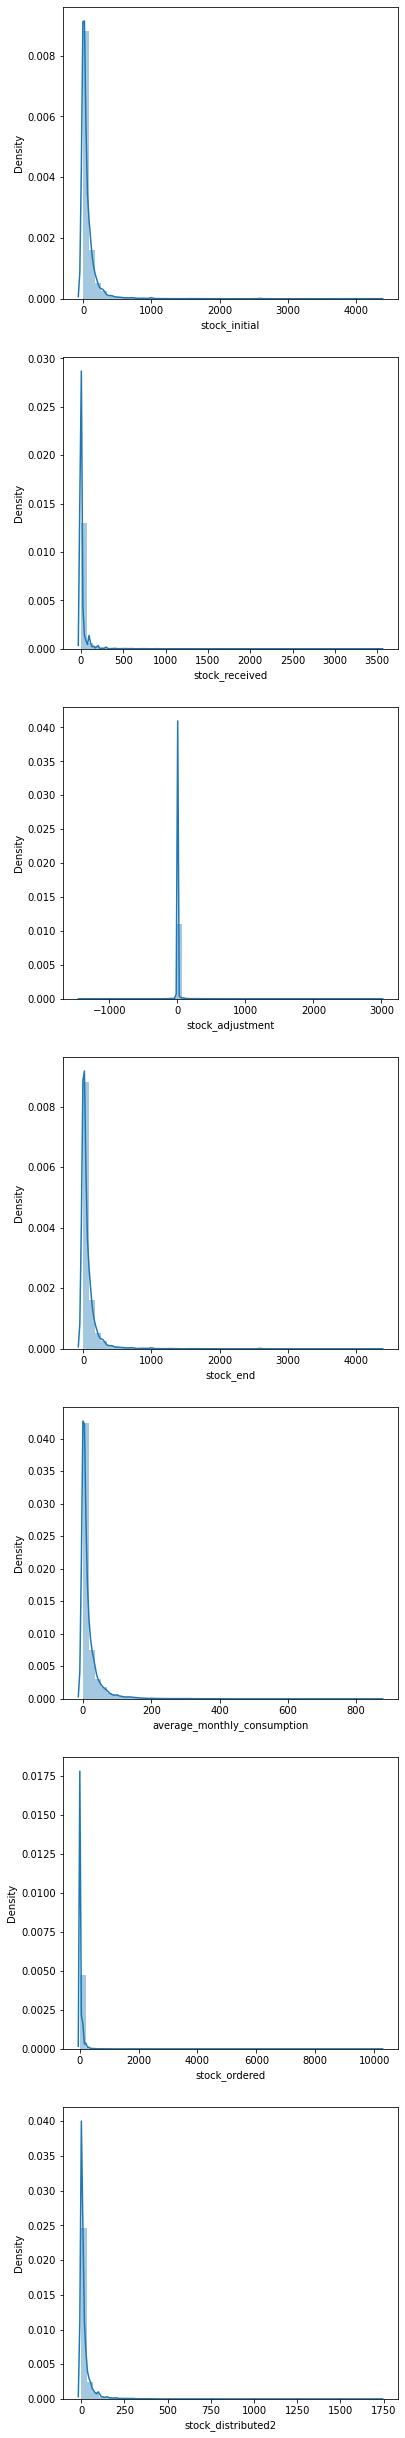

In [39]:
# Train Dataset
import seaborn as sns
cols = ['stock_initial', 'stock_received', 'stock_adjustment', 'stock_end',
       'average_monthly_consumption', 'stock_ordered', 'stock_distributed2']

fig, axs = plt.subplots(len(cols), figsize=(6,44))

for i, col_val in enumerate(cols):
    sns.distplot(df[col_val], ax=axs[i])
    axs[i].set_xlabel(col_val, fontsize=10)

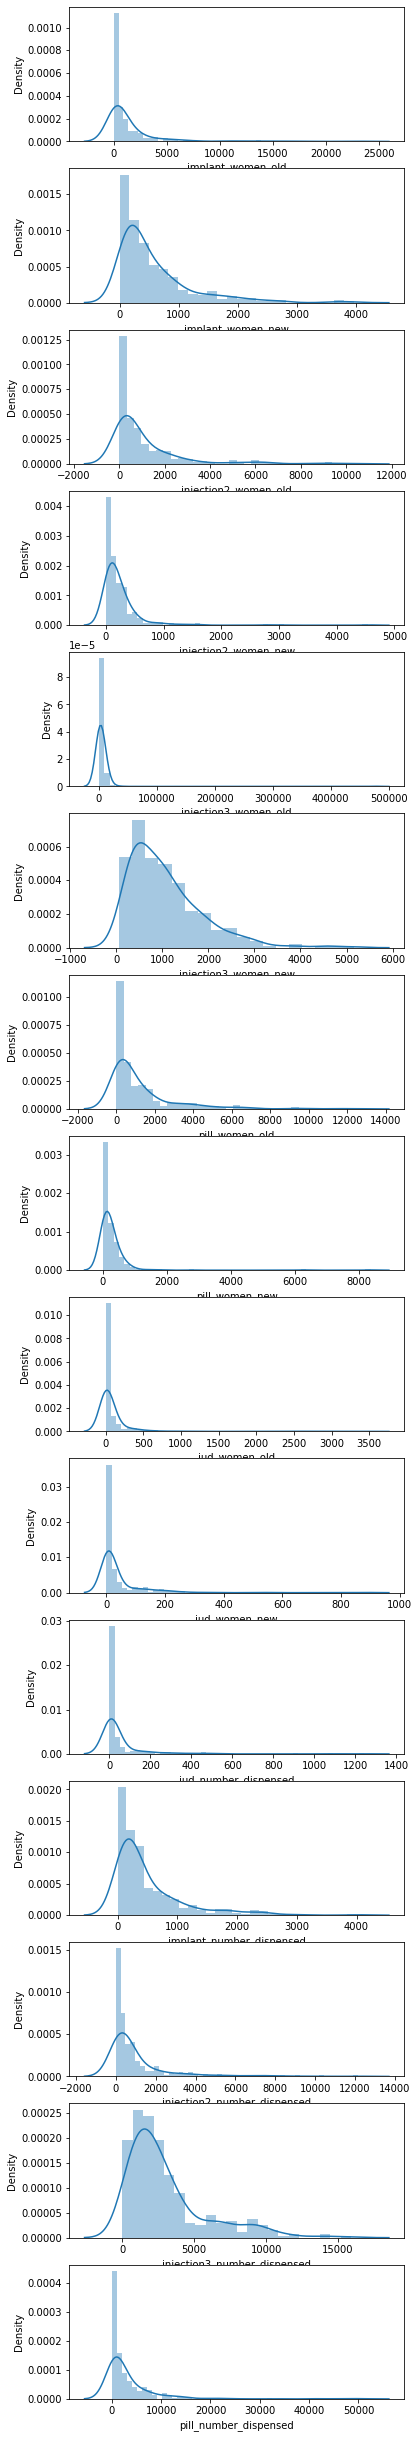

In [40]:
# Annual Dataset
import seaborn as sns
cols = ['implant_women_old', 'implant_women_new',
       'injection2_women_old', 'injection2_women_new', 'injection3_women_old',
       'injection3_women_new', 'pill_women_old', 'pill_women_new',
       'iud_women_old', 'iud_women_new', 'iud_number_dispensed',
       'implant_number_dispensed', 'injection2_number_dispensed',
       'injection3_number_dispensed', 'pill_number_dispensed']

fig, axs = plt.subplots(len(cols), figsize=(6,44))

for i, col_val in enumerate(cols):
    sns.distplot(annual[col_val], ax=axs[i])
    axs[i].set_xlabel(col_val, fontsize=10)

### **UNIVARIATE DATA ANALYSIS**

#### **MEASURES OF CENTRAL TENDENCY**

In [41]:
# Finding the mean of our numerical variables
# Train

num = df[['stock_initial', 'stock_received', 'stock_adjustment', 'stock_end',
       'average_monthly_consumption', 'stock_ordered', 'stock_distributed2']]

num.mean()

stock_initial                  72.021776
stock_received                 18.149793
stock_adjustment                1.398936
stock_end                      72.726117
average_monthly_consumption    17.412359
stock_ordered                  32.600635
stock_distributed2             18.844388
dtype: float64

In [42]:
# Finding the mode of our numerical variables

num.mode()

,stock_initial,stock_received,stock_adjustment,stock_end,average_monthly_consumption,stock_ordered,stock_distributed2
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [43]:
# Finding the median 

num.median()

stock_initial                  20.0
stock_received                  0.0
stock_adjustment                0.0
stock_end                      20.0
average_monthly_consumption     6.0
stock_ordered                   0.0
stock_distributed2              4.0
dtype: float64

#### **MEASURES OF DISPERSION**

In [44]:
# Calculating the variance

num.var()

stock_initial                  32171.362205
stock_received                  6127.055995
stock_adjustment                1710.673124
stock_end                      32717.792181
average_monthly_consumption     1244.961831
stock_ordered                  14080.967095
stock_distributed2              1949.813741
dtype: float64

In [45]:
# Calculating the standard deviation

num.std()

stock_initial                  179.363771
stock_received                  78.275513
stock_adjustment                41.360284
stock_end                      180.880602
average_monthly_consumption     35.284017
stock_ordered                  118.663251
stock_distributed2              44.156695
dtype: float64

In [46]:
#skewness
def my_skew():
  for column in df:
    columncontent = df[column]
    if column in num:
      skew = columncontent.skew()
      if skew > 0:
        print('Positvely skewed')
      elif skew == 0:
        print('Symmetric skew')
      else:
        print('negatively skewed')

      print('column name', column)
      print('Column skew:', skew)
      print('\n') 
#calling
print(my_skew())


Positvely skewed
column name stock_distributed2
Column skew: 8.989274729223592


Positvely skewed
column name stock_initial
Column skew: 9.083867783347344


Positvely skewed
column name stock_received
Column skew: 14.335276135845488


Positvely skewed
column name stock_adjustment
Column skew: 23.378651789071156


Positvely skewed
column name stock_end
Column skew: 9.090969014360054


Positvely skewed
column name stock_ordered
Column skew: 36.61601992523829


Positvely skewed
column name average_monthly_consumption
Column skew: 5.763137921972461


None


In [47]:
#kurtosis
def kurt():
  for column in df:
    columncontent = df[column]
    if column in num:
      kurt = columncontent.kurt()
      if kurt > 0:
        print('Leptokurtic kurtosis')
      elif kurt < 0:
        print('platykurtic distribution')
      else:
        print('mesokurtic distribution')

      print('column name', column)
      print('Column kurt:', kurt)
      print('\n') 
#calling
print(kurt())

Leptokurtic kurtosis
column name stock_distributed2
Column kurt: 177.6255019401869


Leptokurtic kurtosis
column name stock_initial
Column kurt: 129.77316335211881


Leptokurtic kurtosis
column name stock_received
Column kurt: 377.5576297330849


Leptokurtic kurtosis
column name stock_adjustment
Column kurt: 1795.274180287315


Leptokurtic kurtosis
column name stock_end
Column kurt: 128.66115643967035


Leptokurtic kurtosis
column name stock_ordered
Column kurt: 2465.570914576265


Leptokurtic kurtosis
column name average_monthly_consumption
Column kurt: 59.08222005927266


None


#### **CHECKING THE NUMBER OF UNIQUE VALUES**

In [48]:
# Finding the unique values in our district column

df['district'].nunique()

80

In [49]:
# Finding the unique values in our regions column

df['region'].nunique()

20

In [50]:
df.columns

Index(['product_type', 'site_code', 'site_type', 'year', 'month', 'region',
       'district', 'stock_distributed2', 'stock_initial', 'stock_received',
       'stock_adjustment', 'stock_end', 'stock_ordered',
       'average_monthly_consumption'],
      dtype='object')

In [51]:
df['product_type'].unique()

array(['Depo provera', 'Microgynon (pill)', 'Jadelle implant',
       'Microlut (pill)', 'E-Pill', 'Male Condom', 'Female Condom',
       'Implanon implant', 'Noristerat', 'Intrauterine Device ',
       'Sayana press'], dtype=object)

In [52]:
df['site_code'].nunique()

153

#### **COUNTPLOTS**

Text(0.5, 1.0, 'Count plots of Products')

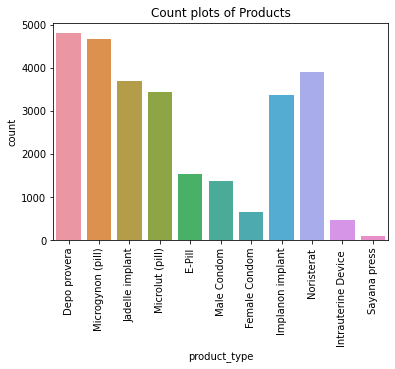

In [53]:
# Product Type
sns.countplot(df['product_type'])
plt.xticks(rotation = 90)
plt.title("Count plots of Products")

Text(0.5, 1.0, 'Count plots of Site Types')

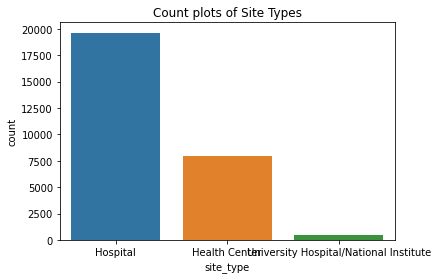

In [54]:
#SITE TYPE
sns.countplot(df['site_type'])
plt.title("Count plots of Site Types")

**INSIGHTS**

* The most common contraceptives used are **Depo Provera** followed by **Microgynon**.
* The least used contraceptive is **Sayana Press** probably because it is new in the market.
* The most common site type which denotes delivery location is **Hospitals**.

### **BIVARIATE DATA ANALYSIS**

#### **HEAT MAPS**

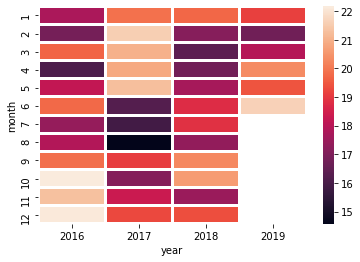

In [55]:
# Plotting a pivot Table to visualize the stock distributed across the years and months

pt= df.pivot_table(index='month',columns='year',values='stock_distributed2')
sns.heatmap(pt, linecolor='white',linewidths=2)

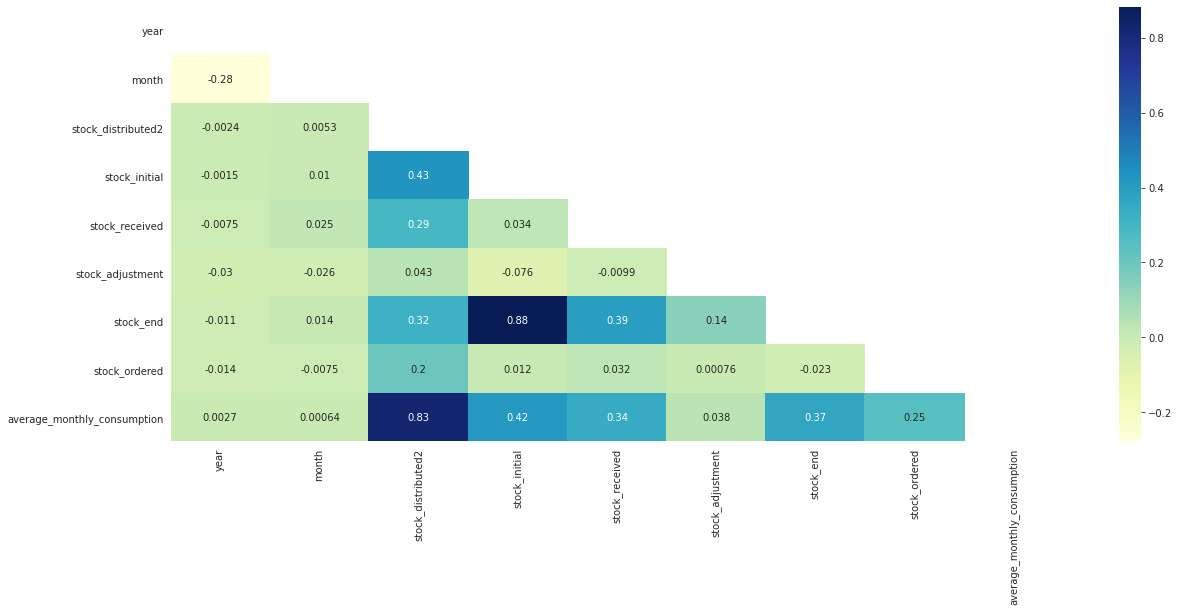

In [56]:
# Plotting a heat map to show correlation

mask = np.zeros_like(df.corr())
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(20,8))
    ax = sns.heatmap(df.corr(),
mask=mask,annot=True,cmap="YlGnBu")

#### **SCATTER PLOTS**

Text(0, 0.5, 'Stock Distributed')

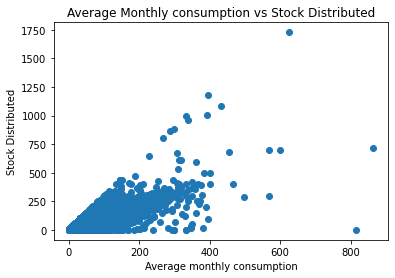

In [57]:
# Plotting scatter plots to show the relationship between variables

plt.scatter(df['average_monthly_consumption'], df['stock_distributed2'])
plt.title('Average Monthly consumption vs Stock Distributed')
plt.xlabel('Average monthly consumption')
plt.ylabel('Stock Distributed')

Text(0.5, 0, 'Stock Initial')

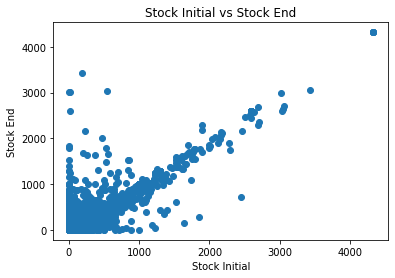

In [58]:
plt.scatter(df['stock_initial'], df['stock_end'])
plt.title('Stock Initial vs Stock End')
plt.ylabel('Stock End')
plt.xlabel('Stock Initial')

These indicate there is a high correlation between **average monthly consumption** and **stock distributed**. Also, the **stock initial** and **stock end** variables have a high correlation.

### **TIME SERIES ANALYSIS**

#### **LINE PLOTS**

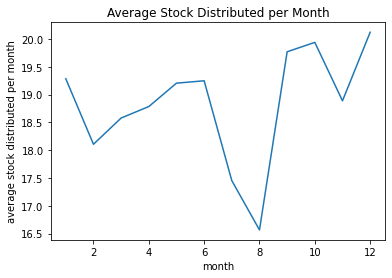

In [59]:
# Average stock distributed per month
g = df.groupby('month')['stock_distributed2'].mean().reset_index(name = 'average stock distributed per month')
sns.lineplot(x = 'month', data = g, y='average stock distributed per month')
plt.title('Average Stock Distributed per Month')
plt.show()

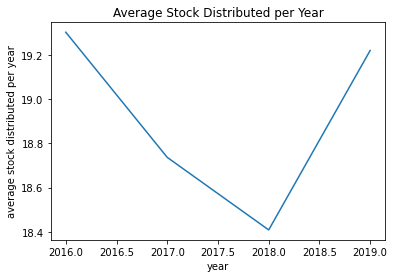

In [60]:
# Average stock distributed per year
j = df.groupby('year')['stock_distributed2'].mean().reset_index(name = 'average stock distributed per year')
sns.lineplot(x = 'year', data = j, y='average stock distributed per year')
plt.title('Average Stock Distributed per Year')
plt.show()

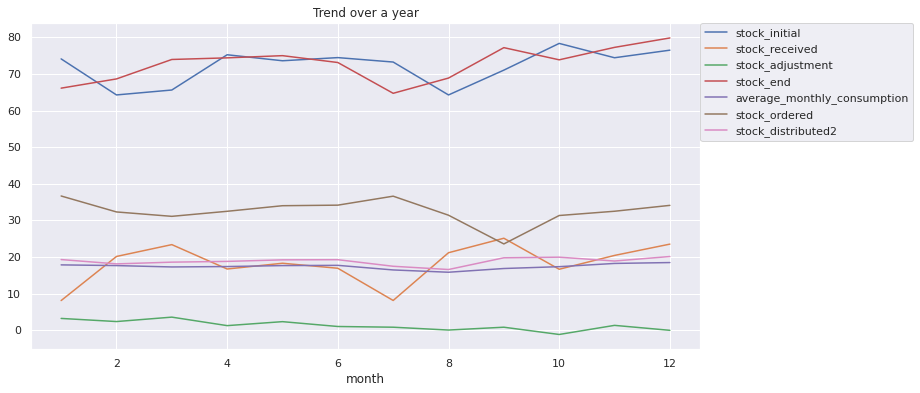

In [61]:
# Monthly Data
monthly_data = df.groupby('month').mean()[['stock_initial', 'stock_received', 'stock_adjustment', 'stock_end','average_monthly_consumption', 'stock_ordered', 'stock_distributed2']]
sns.set(rc={'figure.figsize':(12,6)})
monthly_data.plot.line()
plt.title('Trend over a year')
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)
plt.show()


In [62]:
aug = df[df['month'] == 8]
aug

,product_type,site_code,site_type,year,month,region,district,stock_distributed2,stock_initial,stock_received,stock_adjustment,stock_end,stock_ordered,average_monthly_consumption
date,,,,,,,,,,,,,,
2016-08-01,Depo provera,C2062,Hospital,2016,8,GBEKE,SAKASSOU,0.0,0.0,50.0,0.0,50.0,0.0,0.0
2016-08-01,Noristerat,C1035,Health Center,2016,8,ABIDJAN 2,KOUMASSI-PORT BOUET-VRIDI,66.0,64.0,200.0,0.0,198.0,1.0,68.0
2016-08-01,Noristerat,C3013,Hospital,2016,8,HAMBOL,KATIOLA,14.0,232.0,0.0,0.0,218.0,0.0,27.0
2016-08-01,Jadelle implant,C1069,Health Center,2016,8,ABIDJAN 2,KOUMASSI-PORT BOUET-VRIDI,12.0,14.0,0.0,0.0,2.0,19.0,7.0
2016-08-01,Jadelle implant,C1087,Hospital,2016,8,SUD-COMOE,GRAND-BASSAM,0.0,4.0,0.0,0.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-08-01,Implanon implant,C3015,Hospital,2018,8,PORO-TCHOLOGO-BAGOUE,BOUNDIALI,7.0,23.0,10.0,0.0,26.0,0.0,6.0
2018-08-01,Implanon implant,C2008,Hospital,2018,8,WORODOUGOU-BERE,SEGUELA,10.0,0.0,100.0,0.0,90.0,0.0,13.0
2018-08-01,Microgynon (pill),C1063,Health Center,2018,8,ABIDJAN 2,ABOBO-EST,0.0,0.0,0.0,0.0,0.0,50.0,0.0


In [63]:
aug['stock_distributed2'].value_counts()

0.0      774
1.0      110
3.0       84
2.0       77
5.0       68
        ... 
76.0       1
217.0      1
151.0      1
185.0      1
196.0      1
Name: stock_distributed2, Length: 132, dtype: int64

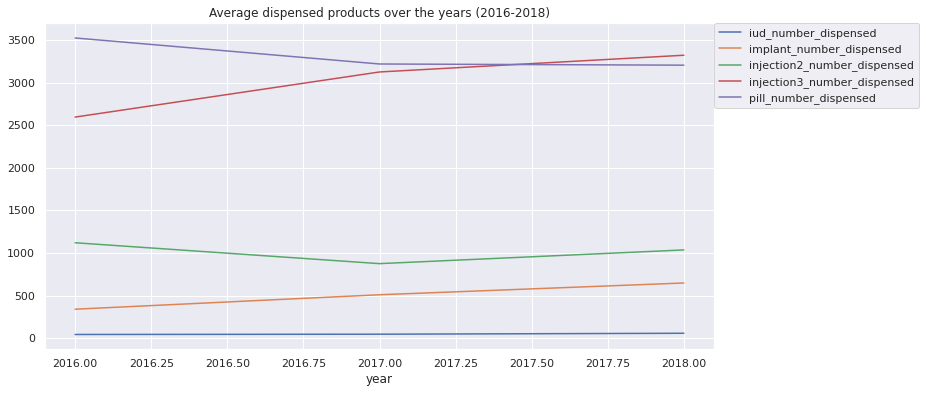

In [64]:
# Line plot for dispensed products over the years
dispensed = annual.groupby('year').mean()[['iud_number_dispensed','implant_number_dispensed','injection2_number_dispensed','injection3_number_dispensed','pill_number_dispensed']]
sns.set(rc={'figure.figsize':(12,6)})
dispensed.plot.line()
plt.title('Average dispensed products over the years (2016-2018)')
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)
plt.show()


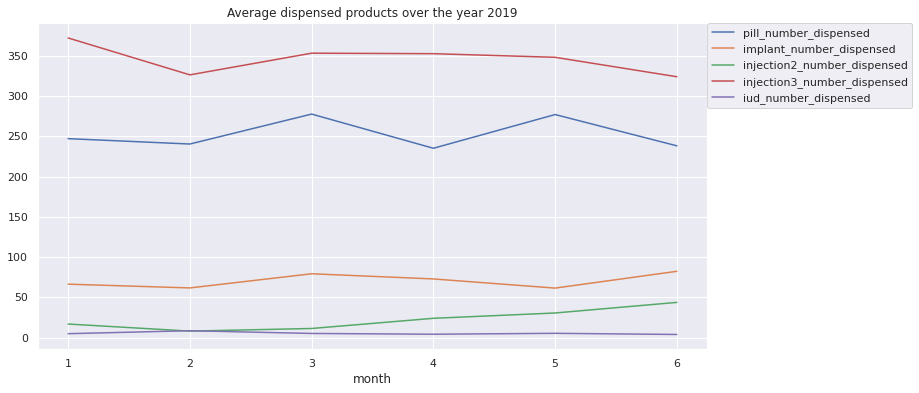

In [65]:
# Line plot for dispensed products over the year 2019
dispensed_2019 = monthly.groupby('month').mean()[['pill_number_dispensed','implant_number_dispensed','injection2_number_dispensed','injection3_number_dispensed','iud_number_dispensed']]
sns.set(rc={'figure.figsize':(12,6)})
dispensed_2019.plot.line()
plt.title('Average dispensed products over the year 2019')
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)
plt.show()

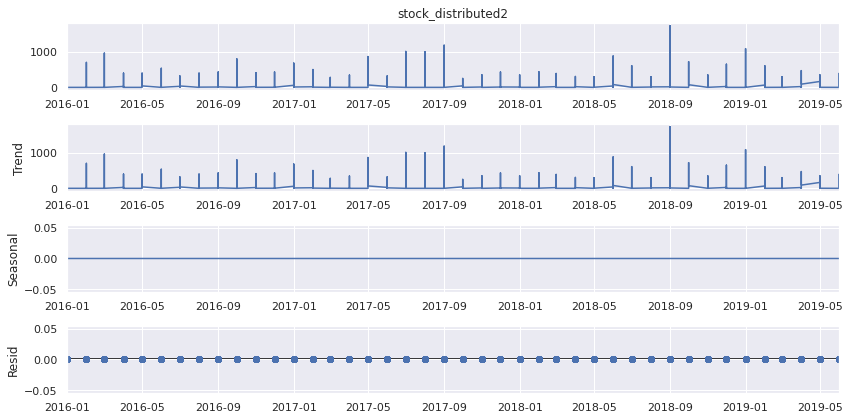

In [66]:
import statsmodels.api as sm

decomposition = sm.tsa.seasonal_decompose (df['stock_distributed2'],freq=1, model = 'additive')
fig = decomposition.plot()

In [67]:
# testing for stationarity
import statsmodels.tsa.stattools as sts

results = sts.adfuller(df['stock_distributed2'])

print(f"ADF Statistic: {results[0]}")
print(f"p-value: {results[1]}")
print("Critical Values:")
for key, value in results[4].items():
    print("\t%s: %.3f" % (key, value))

ADF Statistic: -26.152165668435906
p-value: 0.0
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567


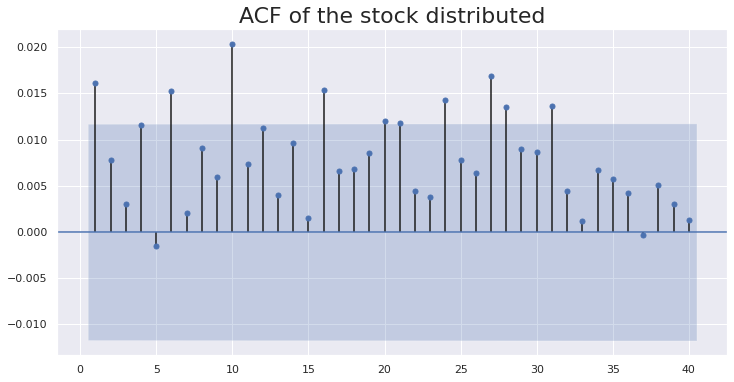

In [68]:
# checking for autocorrelation
import statsmodels.graphics.tsaplots as sgt

sgt.plot_acf(df['stock_distributed2'], lags = 40, zero = False)
plt.title('ACF of the stock distributed', size =22)
plt.show()

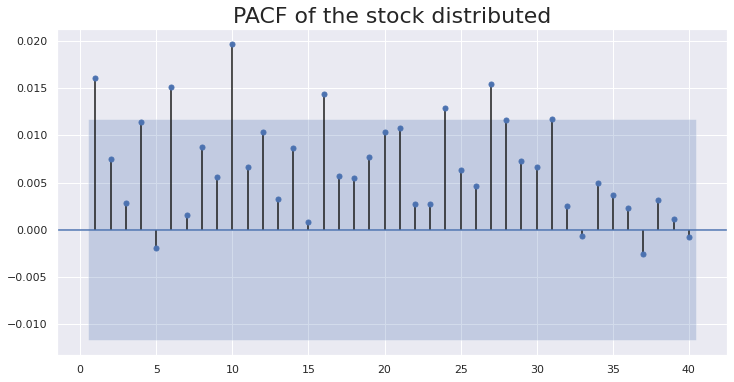

In [69]:
sgt.plot_pacf(df['stock_distributed2'], lags = 40, zero = False, method =('ols'))
plt.title('PACF of the stock distributed', size =22)
plt.show()

##**IMPLEMENTING THE SOLUTION**

### **PRE-PROCESSING**

####**ENCODING OUR COLUMNS**

In [70]:
# the independent variables set
X = df.drop('stock_distributed2', axis=1)
y = df["stock_distributed2"]

In [71]:
df.columns

Index(['product_type', 'site_code', 'site_type', 'year', 'month', 'region',
       'district', 'stock_distributed2', 'stock_initial', 'stock_received',
       'stock_adjustment', 'stock_end', 'stock_ordered',
       'average_monthly_consumption'],
      dtype='object')

In [72]:

from sklearn.preprocessing import LabelEncoder

categ = ['product_type','site_code', 'site_type', 'region','district']

# Encode Categorical Columns
le = LabelEncoder()
df[categ] = df[categ].apply(le.fit_transform)

df.head()


,product_type,site_code,site_type,year,month,region,district,stock_distributed2,stock_initial,stock_received,stock_adjustment,stock_end,stock_ordered,average_monthly_consumption
date,,,,,,,,,,,,,,
2016-01-01,0,125,1,2016,1,15,28,0.0,0.0,0.0,0.0,0.0,25.0,0.0
2016-01-01,7,66,1,2016,1,8,35,417.0,1089.0,0.0,0.0,672.0,18.0,350.0
2016-01-01,5,88,1,2016,1,6,58,0.0,13.0,0.0,0.0,13.0,0.0,0.0
2016-01-01,0,42,1,2016,1,0,25,0.0,0.0,0.0,0.0,0.0,600.0,67.0
2016-01-01,7,139,1,2016,1,5,39,6.0,145.0,0.0,0.0,139.0,0.0,4.0


####**CHECK FOR MULTICOLLINEARITY**

In [73]:

from statsmodels.stats.outliers_influence import variance_inflation_factor
   
# the independent variables set
X = df.drop('stock_distributed2', axis=1)

  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)


                        feature        VIF
0                  product_type   3.480759
1                     site_code   6.580947
2                     site_type   4.800871
3                          year  13.107356
4                         month   4.242991
5                        region   3.216587
6                      district   3.749775
7                 stock_initial  60.419498
8                stock_received  11.767960
9              stock_adjustment   3.739724
10                    stock_end  63.488494
11                stock_ordered   1.179026
12  average_monthly_consumption   4.307814


####**SPLITTING THE DATA**

In [74]:
# Use the timeseries split
from sklearn.model_selection import TimeSeriesSplit
tss = TimeSeriesSplit()
print(tss)

for train_index, test_index in tss.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

TimeSeriesSplit(max_train_size=None, n_splits=5)
TRAIN: [   0    1    2 ... 4669 4670 4671] TEST: [4672 4673 4674 ... 9337 9338 9339]
TRAIN: [   0    1    2 ... 9337 9338 9339] TEST: [ 9340  9341  9342 ... 14005 14006 14007]
TRAIN: [    0     1     2 ... 14005 14006 14007] TEST: [14008 14009 14010 ... 18673 18674 18675]
TRAIN: [    0     1     2 ... 18673 18674 18675] TEST: [18676 18677 18678 ... 23341 23342 23343]
TRAIN: [    0     1     2 ... 23341 23342 23343] TEST: [23344 23345 23346 ... 28009 28010 28011]


####**SCALING AND NORMALISING OUR DATA**

In [75]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### **MODELLING**

#### **BASELINE MODEL**

##### **MULTIPLE LINEAR REGRESSION MODEL**

In [76]:
from sklearn.linear_model import LinearRegression
from math import sqrt
regressor = LinearRegression()

# fitting our basemodel to the training set 
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

# Getting the accuracy and metrics for our algo
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print("The MAE for the linear regression is:", mean_absolute_error(y_test, y_pred))
print("The MSE for the linear regression is:", mean_squared_error(y_test, y_pred))
print("The r2 for the linear regression is:", r2_score(y_test, y_pred))
print("The RMSE for the linear regression is:", sqrt(mean_squared_error(y_test, y_pred)))

The MAE for the linear regression is: 5.918145151318058e-13
The MSE for the linear regression is: 8.816260374045525e-25
The r2 for the linear regression is: 1.0
The RMSE for the linear regression is: 9.389494328261519e-13


#### **ELASTIC NET REGRESSION**

In [77]:
# Elastic Net Model

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet

elastic=ElasticNet(normalize=True)
search=GridSearchCV(estimator=elastic,param_grid={'alpha':np.logspace(-5,2,8),'l1_ratio':[.2,.4,.6,.8]},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)

In [78]:
# Finding the best parameters

search.fit(X,y)
search.best_params_

{'alpha': 1e-05, 'l1_ratio': 0.8}

In [79]:
abs(search.best_score_)

444.3009362991455

In [80]:
elastic=ElasticNet(normalize=True,alpha=0.00001,l1_ratio=0.8)
elastic.fit(X,y)

mse=(mean_squared_error(y_true=y,y_pred=elastic.predict(X)))
rmse = (sqrt(mean_squared_error(y_true=y,y_pred=elastic.predict(X))))
r2score = (r2_score(y_true=y,y_pred=elastic.predict(X)))
print("The MSE for Elastic Net Regression is:", mse)
print("The RMSE for Elastic Net Regression is:", rmse)
print("The r2 score for Elastic Net Regression is:", r2score)

The MSE for Elastic Net Regression is: 453.11719236309693
The RMSE for Elastic Net Regression is: 21.28654956452776
The r2 score for Elastic Net Regression is: 0.7676017153173683


#### **RANDOM FOREST REGRESSION MODEL**

In [81]:
# Random Forest Regressor
# Import the model
from sklearn.ensemble import RandomForestRegressor
 
# min_samples_split or max_depth
forest = RandomForestRegressor(n_estimators = 100, min_samples_split = 20, max_depth=5)
forest = forest.fit(X_train, y_train)

# Predict based on the model we've trained
y_pred = forest.predict(X_test)
# And now we assess the errors
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:',mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', sqrt(mean_squared_error(y_test, y_pred)))
print("R2 Score:", r2_score(y_test, y_pred))

Mean Absolute Error: 7.862328298279765
Mean Squared Error: 488.08618651676744
Root Mean Squared Error: 22.092672688399823
R2 Score: 0.7093282944668066


In [82]:
# Get numerical feature importances
importances = list(forest.feature_importances_)

# We now use some Python magic to connect each feature with its importance
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(X, importances)]

print(feature_importances) #this already has all the information we need, but it can be tricky to see when there are too many features.
print()

# Nice to have: We can sort the values in descending order, since we care about the most important features first.
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

[('product_type', 0.01), ('site_code', 0.0), ('site_type', 0.0), ('year', 0.0), ('month', 0.0), ('region', 0.0), ('district', 0.0), ('stock_initial', 0.07), ('stock_received', 0.01), ('stock_adjustment', 0.0), ('stock_end', 0.02), ('stock_ordered', 0.0), ('average_monthly_consumption', 0.88)]

Variable: average_monthly_consumption Importance: 0.88
Variable: stock_initial        Importance: 0.07
Variable: stock_end            Importance: 0.02
Variable: product_type         Importance: 0.01
Variable: stock_received       Importance: 0.01
Variable: site_code            Importance: 0.0
Variable: site_type            Importance: 0.0
Variable: year                 Importance: 0.0
Variable: month                Importance: 0.0
Variable: region               Importance: 0.0
Variable: district             Importance: 0.0
Variable: stock_adjustment     Importance: 0.0
Variable: stock_ordered        Importance: 0.0


#### **ARIMA MODEL**

In [83]:
# importing the auto autp_arima
#Getting the optimal p,d,q, for arima
from pmdarima import auto_arima
stepwise_fit = auto_arima(df['stock_distributed2'], trace=True,
suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=291700.596, Time=9.29 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=291702.214, Time=0.78 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=291696.981, Time=0.99 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=291697.155, Time=7.06 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=296387.172, Time=0.34 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=291697.495, Time=3.47 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=291698.898, Time=8.99 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=291699.480, Time=8.63 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=295590.431, Time=0.40 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 39.952 seconds


In [84]:
#Using the time series split to split our dataset
from sklearn.model_selection import TimeSeriesSplit
tss = TimeSeriesSplit()
print(tss)

for train_index, test_index in tss.split(df):
    df_train, df_test = df.iloc[train_index], df.iloc[test_index]


TimeSeriesSplit(max_train_size=None, n_splits=5)


In [85]:
#fitting our arima model 
from statsmodels.tsa.arima_model import ARIMA
model=ARIMA(df_train['stock_distributed2'],order=(1,0,0))
model=model.fit()
model.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:     stock_distributed2   No. Observations:                23344
Model:                     ARMA(1, 0)   Log Likelihood             -121859.669
Method:                       css-mle   S.D. of innovations             44.756
Date:                Wed, 04 Aug 2021   AIC                         243725.338
Time:                        11:16:57   BIC                         243749.512
Sample:                             0   HQIC                        243733.188
                                                                              
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       18.7387      0.298     62.812      0.000      18.154      19.323
ar.L1.stock_distributed2     0.0181      0.007      2.766      0.006       0.005       0.031
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           55.2449           +0.0000j           55.2449            0.0000
-----------------------------------------------------------------------------
"""

In [86]:
# predicting our from the arima model
start=len(df_train)
end=len(df_train)+len(df_test)-1
pred=model.predict(start=start,end=end,typ='levels').rename('ARIMA Predictions')

pred.index = df.index[start:end+1]
print(pred)

date
2019-01-01    18.852064
2019-01-01    18.740779
2019-01-01    18.738765
2019-01-01    18.738728
2019-01-01    18.738728
                ...    
2019-06-01    18.738728
2019-06-01    18.738728
2019-06-01    18.738728
2019-06-01    18.738728
2019-06-01    18.738728
Name: ARIMA Predictions, Length: 4668, dtype: float64


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:379: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


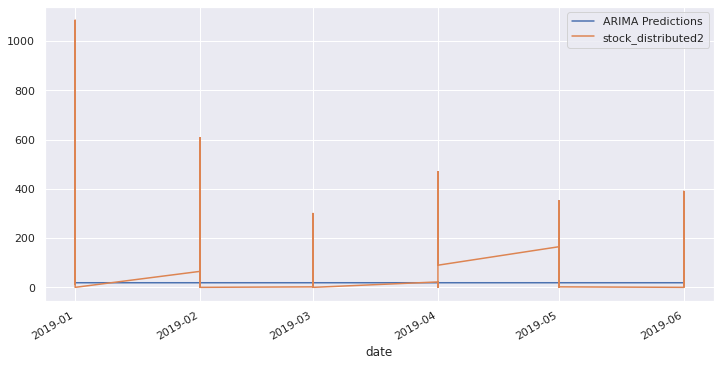

In [87]:
# Plotting the arima model against the actual values
pred.plot(legend=True)
df_test['stock_distributed2'].plot(legend=True)

In [88]:
#Getting our mean of our column
from sklearn.metrics import mean_squared_error
from math import sqrt
df_test['stock_distributed2'].mean()

19.372536418166238

In [89]:
#Getting rmse of the model
rmse=sqrt(mean_squared_error(pred,df_test['stock_distributed2']))
print(rmse)

40.98253933034926


In [90]:
df.tail()

,product_type,site_code,site_type,year,month,region,district,stock_distributed2,stock_initial,stock_received,stock_adjustment,stock_end,stock_ordered,average_monthly_consumption
date,,,,,,,,,,,,,,
2019-06-01,2,9,0,2019,6,1,23,0.0,4.0,0.0,0.0,4.0,0.0,0.0
2019-06-01,1,41,1,2019,6,17,36,0.0,0.0,0.0,0.0,0.0,50.0,0.0
2019-06-01,8,99,1,2019,6,4,66,2.0,2.0,2.0,0.0,2.0,0.0,1.0
2019-06-01,5,141,1,2019,6,12,70,4.0,23.0,0.0,0.0,19.0,2.0,7.0
2019-06-01,3,127,1,2019,6,4,66,1.0,1.0,0.0,0.0,0.0,0.0,0.0


In [91]:
#Predicting the future
index_future_dates = pd.date_range(start = '2019-06-01', end = '2019-12-01', freq='MS')
#print(index_future_dates)
n_forecast = 7
predict = model.predict(start=len(df_train),end=len(df_train) + n_forecast-1).rename("Arima Forecast")
#print(comp_pred)
predict.index = index_future_dates
print(predict)

2019-06-01    18.852064
2019-07-01    18.740779
2019-08-01    18.738765
2019-09-01    18.738728
2019-10-01    18.738728
2019-11-01    18.738728
2019-12-01    18.738728
Freq: MS, Name: Arima Forecast, dtype: float64


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:379: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


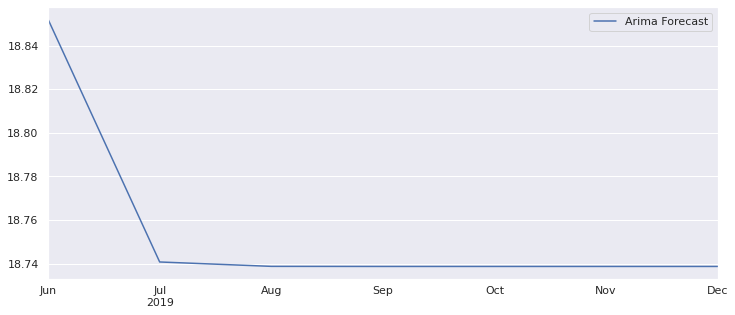

In [92]:
#Plotting forecast 
predict.plot(figsize=(12,5), legend = True)